In [1]:
df = read.csv("./Walmart_Sales_Updated.csv")

In [2]:
#Conferir se já não foi alterado e converter coluna 'Date pata formato Date
if ( class(df$Date) != "Date" ) {
  df$Date = as.Date(df$Date, format = "%Y-%m-%d")
}


In [3]:
head(df)

,X,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_CPI
,<int>,<int>,<date>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,2010-02-05,1643691,0,42.31,2.572,211.0964,8.106,NA
2,2,1,2010-02-12,1641957,1,38.51,2.548,211.2422,8.106,0.06907348
3,3,1,2010-02-19,1611968,0,39.93,2.514,211.2891,8.106,0.02223661
4,4,1,2010-02-26,1409728,0,46.63,2.561,211.3196,8.106,0.01443520
5,5,1,2010-03-05,1554807,0,46.50,2.625,211.3501,8.106,0.01443311
6,6,1,2010-03-12,1439542,0,57.79,2.667,211.3806,8.106,0.01443103


Estudando o efeito da temperatura

[1] 0.004071718


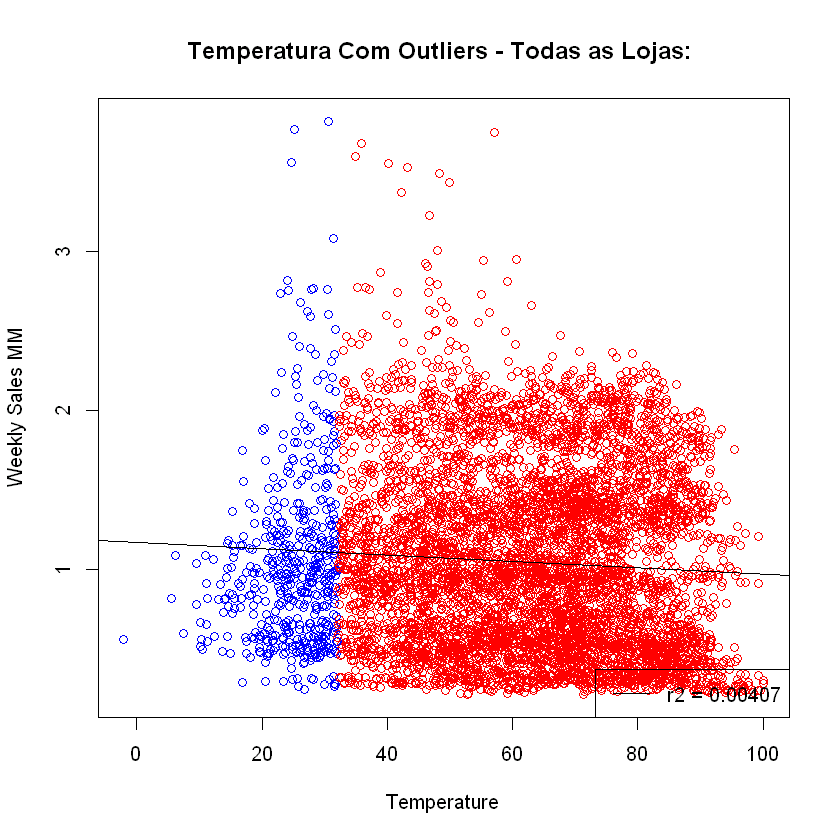

In [4]:
nstore = 0
if (nstore > 0){
    dfplot = df[(df$Store == nstore),]
} else {
    dfplot = df
}

dfplot$Temp_Below_32 = dfplot$Temperature < 32 
if (nstore > 0){
    texto_main = paste( 'Temperatura Com Outliers - Loja: ', nstore)
    } else {
    texto_main = 'Temperatura Com Outliers - Todas as Lojas: '
    }

plot(dfplot$Temperature,dfplot$Weekly_Sales/1000000,
    ylab = 'Weekly Sales MM',
    xlab = 'Temperature',
     col = ifelse(dfplot$Temp_Below_32, "blue", "red"),
    main = texto_main)
lm_model = lm(dfplot$Weekly_Sales/1000000 ~ dfplot$Temperature)
abline(lm_model, col="black")

r_squared = summary(lm_model)$r.squared
legend("bottomright", legend=paste("r2 =", round(r_squared, 5)), 
       lty=1, col="black", text.col="black")
print(r_squared)

[1] 0.001966052


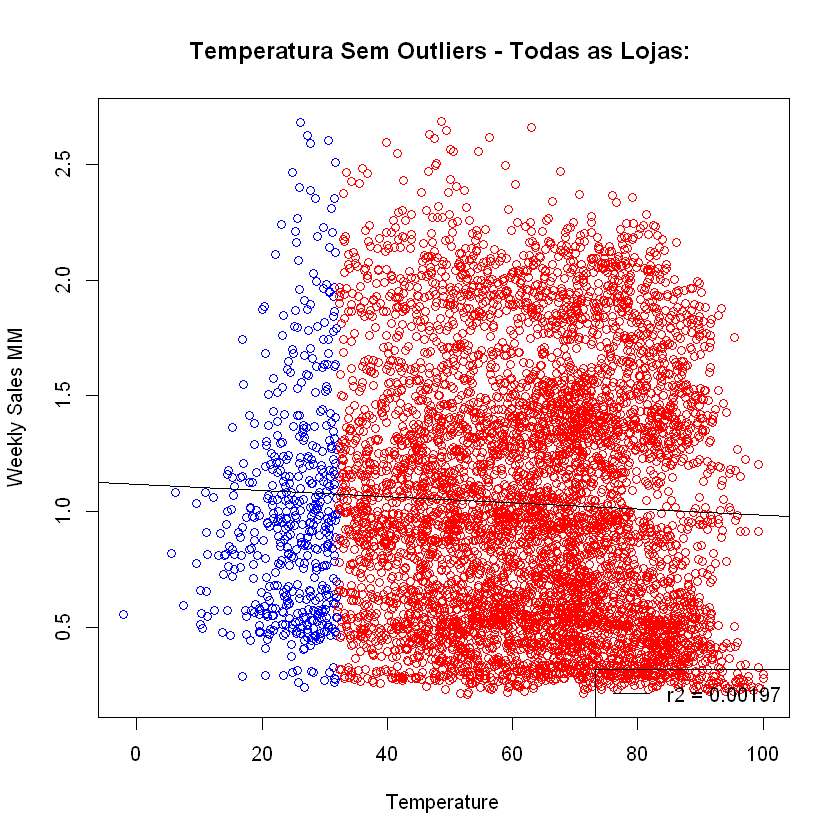

In [7]:


# Calculate Q1, Q3, and IQR
if (nstore > 0){
    Q1 <- quantile(df[df$Store == nstore,]$Weekly_Sales, 0.25)
    Q3 <- quantile(df[df$Store == nstore,]$Weekly_Sales, 0.75)
    } else {
    Q1 <- quantile(df$Weekly_Sales, 0.25)
    Q3 <- quantile(df$Weekly_Sales, 0.75) 
    }

IQR <- Q3 - Q1

# Define outlier bounds
lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR

if (nstore > 0){
   dfplot = df[(df$Store == nstore) & (df$Weekly_Sales > lower_bound) & (df$Weekly_Sales < upper_bound),]
} else {
    dfplot = dfplot = df[(df$Weekly_Sales > lower_bound) & (df$Weekly_Sales < upper_bound),]
}
dfplot$Temp_Below_32 = dfplot$Temperature < 32 
if (nstore > 0){
    texto_main = paste( 'Temperatura Sem Outliers - Loja: ', nstore)
    } else {
    texto_main = 'Temperatura Sem Outliers - Todas as Lojas: '
    }
plot(dfplot$Temperature,dfplot$Weekly_Sales/1000000,
    ylab = 'Weekly Sales MM',
    xlab = 'Temperature',
     col = ifelse(dfplot$Temp_Below_32, "blue", "red"),
    main = texto_main)
lm_model = lm(dfplot$Weekly_Sales/1000000 ~ dfplot$Temperature)
abline(lm_model, col="black")

r_squared = summary(lm_model)$r.squared
legend("bottomright", legend=paste("r2 =", round(r_squared, 5)), 
       lty=1, col="black", text.col="black")
print(r_squared)

A correlação direta entre a tempeatura e as vendas é fraca. 